In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Humidity

In [2]:
humidity_data = pd.read_csv('/Users/lyu/School/SemeterA/Big_Data/final_project/2019-2023full_data/data_info_main_par.csv', 
                   header=0, names=["Date", "Relative Humidity"], usecols=[0,2])

In [3]:
humidity_data_2020 = humidity_data[humidity_data["Date"].str.startswith("2020")]
humidity_data_2020["Date"] = pd.to_datetime(humidity_data_2020["Date"])
daily_data_2020 = humidity_data_2020.groupby(humidity_data_2020["Date"].dt.date)["Relative Humidity"].mean()

daily_humidity_data_2020 = pd.DataFrame({"Date": daily_data_2020.index, "Relative Humidity": daily_data_2020.values})
daily_humidity_data_2020['Date'] = daily_humidity_data_2020['Date'].astype(str).str[-5:]
#删除闰年
daily_humidity_data_2020.drop(59, inplace=True)

/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/1256628134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity_data_2020["Date"] = pd.to_datetime(humidity_data_2020["Date"])


In [4]:
humidity_data_2021 = humidity_data[humidity_data["Date"].str.startswith("2021")]
humidity_data_2021["Date"] = pd.to_datetime(humidity_data_2021["Date"])
daily_data_2021 = humidity_data_2021.groupby(humidity_data_2021["Date"].dt.date)["Relative Humidity"].mean()
daily_humidity_data_2021 = pd.DataFrame({"Date": daily_data_2021.index, "Relative Humidity": daily_data_2021.values})
daily_humidity_data_2021['Date'] = daily_humidity_data_2021['Date'].astype(str).str[-5:]

/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/1671365137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity_data_2021["Date"] = pd.to_datetime(humidity_data_2021["Date"])


In [5]:
humidity_data_2022 = humidity_data[humidity_data["Date"].str.startswith("2022")]
humidity_data_2022["Date"] = pd.to_datetime(humidity_data_2022["Date"])
daily_data_2022 = humidity_data_2022.groupby(humidity_data_2022["Date"].dt.date)["Relative Humidity"].mean()
daily_humidity_data_2022 = pd.DataFrame({"Date": daily_data_2022.index, "Relative Humidity": daily_data_2022.values})
daily_humidity_data_2022['Date'] = daily_humidity_data_2022['Date'].astype(str).str[-5:]

/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/1567101537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity_data_2022["Date"] = pd.to_datetime(humidity_data_2022["Date"])


In [6]:
humidity_data_2023 = humidity_data[humidity_data["Date"].str.startswith("2023")]
humidity_data_2023["Date"] = pd.to_datetime(humidity_data_2023["Date"])
daily_data_2023 = humidity_data_2023.groupby(humidity_data_2023["Date"].dt.date)["Relative Humidity"].mean()
daily_humidity_data_2023 = pd.DataFrame({"Date": daily_data_2023.index, "Relative Humidity": daily_data_2023.values})
daily_humidity_data_2023['Date'] = daily_humidity_data_2023['Date'].astype(str).str[-5:]

/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/4265298260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity_data_2023["Date"] = pd.to_datetime(humidity_data_2023["Date"])


In [7]:
print(daily_humidity_data_2023)

      Date  Relative Humidity
0    01-01          64.666667
1    01-02          65.375000
2    01-03          68.125000
3    01-04          73.750000
4    01-05          76.875000
..     ...                ...
311  11-08          76.958333
312  11-09          81.083333
313  11-10          82.291667
314  11-11          84.750000
315  11-12          77.391304

[316 rows x 2 columns]


In [8]:
print(type(daily_humidity_data_2023))

<class 'pandas.core.frame.DataFrame'>


In [9]:
daily_humidity_data = pd.concat([daily_humidity_data_2020, daily_humidity_data_2021, daily_humidity_data_2022, daily_humidity_data_2023])

daily_avg_humidity = daily_humidity_data.groupby('Date')['Relative Humidity'].mean().reset_index()

In [10]:
daily_avg_humidity

,Date,Relative Humidity
0,01-01,65.270833
1,01-02,67.666667
2,01-03,73.293931
3,01-04,74.322917
4,01-05,74.062500
...,...,...
360,12-27,73.444444
361,12-28,70.430556
362,12-29,69.165338
363,12-30,63.736111


### Rain

In [11]:
rain_data = pd.read_csv('/Users/lyu/School/SemeterA/Big_Data/final_project/2019-2023full_data/data_info_rain_par.csv', 
                   header=0, names=["Time","area","rain"])

def process_column(value):
    if 'to' in value:
        numbers = [int(num) for num in value.split(' to ')]
        return sum(numbers) / len(numbers)
    else:
        return int(value)

# 2020年每日各地区雨量数据
rain_data_2020 = rain_data[rain_data["Time"].str.startswith("2020")]
rain_data_2020['rain'] = rain_data_2020['rain'].apply(process_column)
# 使用iterrows()遍历DataFrame
# rain_data_2020['rain'] = rain_data_2020['rain'].apply(lambda x: re.search(r'to (\d+)', x).group(1) if re.search(r'to (\d+)', x) else x).astype(int)
   
# # 2021年每日各地区雨量数据
rain_data_2021 = rain_data[rain_data["Time"].str.startswith("2021")]
rain_data_2021['rain'] = rain_data_2021['rain'].apply(process_column)
# rain_data_2021["rain"] = rain_data_2021["rain"].apply(lambda x: re.search(r'to (\d+)', x).group(1) if re.search(r'to (\d+)', x) else x).astype(int)
# 
# # 2022年每日各地区雨量数据
rain_data_2022 = rain_data[rain_data["Time"].str.startswith("2022")]
rain_data_2022['rain'] = rain_data_2022['rain'].apply(process_column)
# rain_data_2022["rain"] = rain_data_2022["rain"].apply(lambda x: re.search(r'to (\d+)', x).group(1) if re.search(r'to (\d+)', x) else x).astype(int)
# 
# # 2023年每日各地区雨量数据 只处理到10月不然会影响十一月的值
rain_data_2023 = rain_data[rain_data["Time"].str.startswith("2023")]
rain_data_2023['rain'] = rain_data_2023['rain'].apply(process_column)
rain_data_2023 = rain_data_2023[:11340]

/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/3877821037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data_2020['rain'] = rain_data_2020['rain'].apply(process_column)
/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/3877821037.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data_2021['rain'] = rain_data_2021['rain'].apply(process_column)
/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/3877821037.py:24: SettingWithCopyWarning: 
A valu

In [12]:
rain_data_2020

,Time,area,rain
6686,2020-01-13 04:02:00,North District,0.5
6687,2020-01-25 17:02:00,Tai Po,0.5
6688,2020-01-25 17:02:00,Eastern District,0.5
6689,2020-01-25 17:02:00,Sai Kung,0.5
6690,2020-01-25 17:02:00,North District,1.0
...,...,...,...
17893,2020-12-23 18:02:00,Wong Tai Sin,0.5
17894,2020-12-23 18:02:00,Kowloon City,0.5
17895,2020-12-23 19:02:00,Tai Po,0.5
17896,2020-12-23 19:02:00,Eastern District,0.5


In [13]:
rain_data_2022

,Time,area,rain
29187,2022-01-05 01:02:00,Islands District,0.5
29188,2022-01-05 04:02:00,Tuen Mun,0.5
29189,2022-01-05 04:02:00,Islands District,0.5
29190,2022-01-11 02:02:00,Tuen Mun,0.5
29191,2022-01-11 02:02:00,Yuen Long,0.5
...,...,...,...
43498,2022-12-17 07:02:00,Southern District,0.5
43499,2022-12-17 07:02:00,Yuen Long,0.5
43500,2022-12-17 07:02:00,Central &amp; Western District,0.5
43501,2022-12-17 08:02:00,Islands District,0.5


In [14]:
rain_data_2020['Date'] = rain_data_2020["Time"].str[5:10]
data_2020 = rain_data_2020.groupby(['Date'])["rain"].sum()
data_2020 = data_2020.reset_index()

rain_data_2021['Date'] = rain_data_2021["Time"].str[5:10]
data_2021 = rain_data_2021.groupby(['Date'])["rain"].sum()
data_2021 = data_2021.reset_index()

rain_data_2022['Date'] = rain_data_2022["Time"].str[5:10]
data_2022 = rain_data_2022.groupby(['Date'])["rain"].sum()
data_2022 = data_2022.reset_index()

rain_data_2023['Date'] = rain_data_2023["Time"].str[5:10]
data_2023 = rain_data_2023.groupby(['Date'])["rain"].sum()
data_2023 = data_2023.reset_index()
data_2023.drop(11, inplace=True)
# result = data_2023[data_2023['month'] == '01']
# result

# all_data = pd.concat([data_2020, data_2021, data_2022, data_2023])
# monthly_total_rain = all_data.groupby(['Date'])['rain'].mean()
# monthly_total_rain= monthly_total_rain.reset_index()

/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/2668961245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data_2020['Date'] = rain_data_2020["Time"].str[5:10]
/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/2668961245.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_data_2021['Date'] = rain_data_2021["Time"].str[5:10]
/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/2668961245.py:9: SettingWithCopyWarning: 
A value is trying to be set on a 

In [15]:
data_2020

,Date,rain
0,01-13,0.5
1,01-25,51.5
2,01-26,408.5
3,02-03,4.0
4,02-04,23.0
...,...,...
186,11-19,3.5
187,11-21,11.0
188,11-22,6.5
189,11-23,5.5


In [16]:
data_2020['Date'] = pd.to_datetime(data_2020['Date'], format='%m-%d')

start_date = data_2020['Date'].min()
end_date = data_2020['Date'].max()

# 调整日期范围的起始和结束
start_date_adjusted = start_date - pd.DateOffset(days=12)
end_date_adjusted = end_date + pd.DateOffset(days=8)

full_date_range = pd.date_range(start=start_date_adjusted, end=end_date_adjusted, freq='D')

# 创建包含日期范围的新 DataFrame，并将其与原始 DataFrame 合并
full_df = pd.DataFrame({'Date': full_date_range})
data_2020_all = pd.merge(full_df, data_2020, on='Date', how='left')

# 将缺失值填充为0
data_2020_all['rain'] = data_2020_all['rain'].fillna(0)

data_2020_all['Date'] = data_2020_all['Date'].dt.strftime('%m-%d')

# 打印结果
data_2020_all

,Date,rain
0,01-01,0.0
1,01-02,0.0
2,01-03,0.0
3,01-04,0.0
4,01-05,0.0
...,...,...
360,12-27,0.0
361,12-28,0.0
362,12-29,0.0
363,12-30,0.0


In [17]:
data_2021['Date'] = pd.to_datetime(data_2021['Date'], format='%m-%d')

start_date = data_2021['Date'].min()
end_date = data_2021['Date'].max()

# 调整日期范围的起始和结束
start_date_adjusted = start_date - pd.DateOffset(days=40)
end_date_adjusted = end_date + pd.DateOffset(days=7)

full_date_range = pd.date_range(start=start_date_adjusted, end=end_date_adjusted, freq='D')

# 创建包含日期范围的新 DataFrame，并将其与原始 DataFrame 合并
full_df = pd.DataFrame({'Date': full_date_range})
data_2021_all = pd.merge(full_df, data_2021, on='Date', how='left')

# 将缺失值填充为0
data_2021_all['rain'] = data_2021_all['rain'].fillna(0)

data_2021_all['Date'] = data_2021_all['Date'].dt.strftime('%m-%d')

# 打印结果
data_2021_all

,Date,rain
0,01-01,0.0
1,01-02,0.0
2,01-03,0.0
3,01-04,0.0
4,01-05,0.0
...,...,...
360,12-27,0.0
361,12-28,0.0
362,12-29,0.0
363,12-30,0.0


In [18]:
data_2022['Date'] = pd.to_datetime(data_2022['Date'], format='%m-%d')

start_date = data_2022['Date'].min()
end_date = data_2022['Date'].max()

# 调整日期范围的起始和结束
start_date_adjusted = start_date - pd.DateOffset(days=4)
end_date_adjusted = end_date + pd.DateOffset(days=14)

full_date_range = pd.date_range(start=start_date_adjusted, end=end_date_adjusted, freq='D')

# 创建包含日期范围的新 DataFrame，并将其与原始 DataFrame 合并
full_df = pd.DataFrame({'Date': full_date_range})
data_2022_all = pd.merge(full_df, data_2022, on='Date', how='left')

# 将缺失值填充为0
data_2022_all['rain'] = data_2022_all['rain'].fillna(0)

data_2022_all['Date'] = data_2022_all['Date'].dt.strftime('%m-%d')

# 打印结果
data_2022_all

,Date,rain
0,01-01,0.0
1,01-02,0.0
2,01-03,0.0
3,01-04,0.0
4,01-05,1.5
...,...,...
360,12-27,0.0
361,12-28,0.0
362,12-29,0.0
363,12-30,0.0


In [19]:
data_2023['Date'] = pd.to_datetime(data_2023['Date'], format='%m-%d')

start_date = data_2023['Date'].min()
end_date = data_2023['Date'].max()

# 调整日期范围的起始和结束
start_date_adjusted = start_date - pd.DateOffset(days=1)
end_date_adjusted = end_date + pd.DateOffset(days=0)

full_date_range = pd.date_range(start=start_date_adjusted, end=end_date_adjusted, freq='D')

# 创建包含日期范围的新 DataFrame，并将其与原始 DataFrame 合并
full_df = pd.DataFrame({'Date': full_date_range})
data_2023_all = pd.merge(full_df, data_2023, on='Date', how='left')

# 将缺失值填充为0
data_2023_all['rain'] = data_2023_all['rain'].fillna(0)

data_2023_all['Date'] = data_2023_all['Date'].dt.strftime('%m-%d')

# 打印结果
data_2023_all

,Date,rain
0,01-01,0.0
1,01-02,0.5
2,01-03,1.0
3,01-04,0.0
4,01-05,0.0
...,...,...
298,10-26,0.0
299,10-27,0.0
300,10-28,63.0
301,10-29,61.0


In [20]:
merged_df = pd.concat([data_2020_all, data_2021_all, data_2022_all, data_2023_all], ignore_index=True)
daily_avg_rain = merged_df.groupby(['Date'])['rain'].mean().reset_index()

In [21]:
daily_avg_rain

,Date,rain
0,01-01,0.000
1,01-02,0.125
2,01-03,0.250
3,01-04,0.000
4,01-05,0.375
...,...,...
360,12-27,0.000
361,12-28,0.000
362,12-29,0.000
363,12-30,0.000


### Temperature

In [22]:
dataset = pd.read_csv("/Users/lyu/School/SemeterA/Big_Data/final_project/2019-2023full_data/data_info_main_par.csv")
dataset["Time"] = pd.to_datetime(dataset["Time"])
# 根据日期（天）对数据进行分组，并计算每一天的平均气温
daily_average = dataset.groupby(dataset["Time"].dt.date).agg({"Temperature": "mean", "Relative Humidity": "mean"}).reset_index()

# 创建一个新的DataFrame，包含日期和对应的平均气温
new_data = pd.DataFrame({"Time": daily_average["Time"], "Temperature": daily_average["Temperature"],"Relative Humidity": daily_average["Relative Humidity"]})
new_data["THI"] = 0.81 * new_data["Temperature"] + 0.01 * 0.01 * new_data["Relative Humidity"] * (0.99 * new_data["Temperature"] - 14.3) + 46.3
# 将Time列转换为日期类型
new_data['Time'] = pd.to_datetime(new_data['Time']).dt.date
new_data

,Time,Temperature,Relative Humidity,THI
0,2019-07-31,26.095238,91.500000,67.542682
1,2019-08-01,26.515152,93.545455,67.889060
2,2019-08-02,26.906250,91.500000,68.206948
3,2019-08-03,26.642857,91.750000,67.991516
4,2019-08-04,27.750000,82.875000,68.886667
...,...,...,...,...
1561,2023-11-08,25.000000,76.958333,66.630421
1562,2023-11-09,25.625000,81.083333,67.145999
1563,2023-11-10,26.958333,82.291667,68.238199
1564,2023-11-11,25.208333,84.750000,66.809062


In [23]:
data_2020 = new_data[new_data["Time"].astype(str).str[:4] == '2020']
new_data_2020 = pd.DataFrame({"Date": data_2020["Time"], "Temperature": data_2020["Temperature"],
                              "Relative Humidity": data_2020["Relative Humidity"]}).reset_index()
# new_data_2020.drop("index")
new_data_2020["Date"] = new_data_2020["Date"].astype(str).str[-5:]
new_data_2020.drop(59, inplace=True)
data_2021 = new_data[new_data["Time"].astype(str).str[:4] == '2021']
new_data_2021 = pd.DataFrame({"Date": data_2021["Time"], "Temperature": data_2021["Temperature"],
                              "Relative Humidity": data_2021["Relative Humidity"]}).reset_index()
# new_data_2020.drop("index")
new_data_2021["Date"] = new_data_2021["Date"].astype(str).str[-5:]
data_2022 = new_data[new_data["Time"].astype(str).str[:4] == '2022']
new_data_2022 = pd.DataFrame({"Date": data_2022["Time"], "Temperature": data_2022["Temperature"],
                              "Relative Humidity": data_2022["Relative Humidity"]}).reset_index()
# new_data_2020.drop("index")
new_data_2022["Date"] = new_data_2022["Date"].astype(str).str[-5:]
data_2023 = new_data[new_data["Time"].astype(str).str[:4] == '2023']
new_data_2023 = pd.DataFrame({"Date": data_2023["Time"], "Temperature": data_2023["Temperature"],
                              "Relative Humidity": data_2023["Relative Humidity"]}).reset_index()
# new_data_2020.drop("index")
new_data_2023["Date"] = new_data_2023["Date"].astype(str).str[-5:]

In [24]:
merged_df = pd.concat([new_data_2020, new_data_2021, new_data_2022, new_data_2023], ignore_index=True)
daily_avg_temperature = merged_df.groupby(['Date'])['Temperature'].mean().reset_index()

In [25]:
daily_avg_temperature

,Date,Temperature
0,01-01,15.987319
1,01-02,17.322917
2,01-03,17.776721
3,01-04,18.427083
4,01-05,19.395833
...,...,...
360,12-27,16.069444
361,12-28,17.722222
362,12-29,19.068841
363,12-30,16.138889


### UV

In [26]:
data = pd.read_csv("/Users/lyu/School/SemeterA/Big_Data/final_project/2019-2023full_data/data_info_uv_par.csv")

data_2020 = data[data["Time"].str.startswith("2020")]
data_2020

,Time,UV,Intensity
1867,2020-01-01 08:02:00,0.0,low
1868,2020-01-01 09:02:00,0.1,low
1869,2020-01-01 09:41:00,0.1,low
1870,2020-01-01 10:02:00,1.0,low
1871,2020-01-01 11:02:00,2.0,low
...,...,...,...
5766,2020-12-31 14:02:00,5.0,moderate
5767,2020-12-31 15:02:00,3.0,moderate
5768,2020-12-31 16:31:00,2.0,low
5769,2020-12-31 17:02:00,0.6,low


In [27]:
data_2020["Time"] = pd.to_datetime(data_2020["Time"])
# 根据日期（天）对数据进行分组，取一天的紫外线强度峰值
daily_average = data_2020.groupby(data_2020["Time"].dt.date)["UV"].max()

new_data_2020 = pd.DataFrame({"Time": daily_average.index, "UV": daily_average.values})
new_data_2020["Time"] = new_data_2020["Time"].astype(str).str[-5:]
new_data_2020.drop(59, inplace=True)
data_2021 = data[data["Time"].str.startswith("2021")]

data_2021["Time"] = pd.to_datetime(data_2021["Time"])
# 根据日期（天）对数据进行分组，取一天的紫外线强度峰值
daily_average = data_2021.groupby(data_2021["Time"].dt.date)["UV"].max()

new_data_2021 = pd.DataFrame({"Time": daily_average.index, "UV": daily_average.values})
new_data_2021["Time"] = new_data_2021["Time"].astype(str).str[-5:]
data_2022 = data[data["Time"].str.startswith("2022")]

data_2022["Time"] = pd.to_datetime(data_2022["Time"])
# 根据日期（天）对数据进行分组，取一天的紫外线强度峰值
daily_average = data_2022.groupby(data_2022["Time"].dt.date)["UV"].max()

new_data_2022 = pd.DataFrame({"Time": daily_average.index, "UV": daily_average.values})
new_data_2022["Time"] = new_data_2022["Time"].astype(str).str[-5:]
data_2023 = data[data["Time"].str.startswith("2023")]

data_2023["Time"] = pd.to_datetime(data_2023["Time"])
# 根据日期（天）对数据进行分组，取一天的紫外线强度峰值
daily_average = data_2023.groupby(data_2023["Time"].dt.date)["UV"].max()

new_data_2023 = pd.DataFrame({"Time": daily_average.index, "UV": daily_average.values})
new_data_2023["Time"] = new_data_2023["Time"].astype(str).str[-5:]

/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/134544593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020["Time"] = pd.to_datetime(data_2020["Time"])
/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/134544593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["Time"] = pd.to_datetime(data_2021["Time"])
/var/folders/1y/4b73j19n3tn6q7jnly7bx_600000gn/T/ipykernel_20265/134544593.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [28]:
merged_df = pd.concat([new_data_2020, new_data_2021, new_data_2022, new_data_2023], ignore_index=True)
daily_avg_uv = merged_df.groupby(['Time'])['UV'].mean().reset_index()
daily_avg_uv = daily_avg_uv.rename(columns={'Time':'Date'})

### Normalized

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
data_to_normalize_humidity = daily_avg_humidity[['Relative Humidity']]
data_to_normalize_rain = daily_avg_rain[['rain']]
data_to_normalize_temperature = daily_avg_temperature[['Temperature']]
data_to_normalize_uv = daily_avg_uv[['UV']]

normalized_data_humidity = scaler.fit_transform(data_to_normalize_humidity)
normalized_data_rain = scaler.fit_transform(data_to_normalize_rain)
normalized_data_temperature = scaler.fit_transform(data_to_normalize_temperature)
normalized_data_uv = scaler.fit_transform(data_to_normalize_uv)

In [31]:
daily_avg_humidity['Relative Humidity'] = normalized_data_humidity
daily_avg_rain['rain'] = normalized_data_rain
daily_avg_temperature['Temperature'] = normalized_data_temperature
daily_avg_uv['UV'] = normalized_data_uv

### Outdoor index

In [32]:
humidity_weight = 0.25
rain_weight = 0.25
temperature_weight = 0.4
uv_weight = 0.1

In [33]:
# 湿度函数
def humidity_index(x):
    return -(np.square(x)) + 1

In [34]:
daily_avg_humidity['Relative Humidity'] = daily_avg_humidity['Relative Humidity'].apply(humidity_index)

In [35]:
daily_avg_humidity

,Date,Relative Humidity
0,01-01,0.868335
1,01-02,0.816327
2,01-03,0.660205
3,01-04,0.626504
4,01-05,0.635184
...,...,...
360,12-27,0.655375
361,12-28,0.745600
362,12-29,0.779403
363,12-30,0.897112


In [36]:
# 温度函数
def temperature_index(x):
    return -((x-0.5)**6)*64 + 1

In [37]:
daily_avg_temperature['Temperature'] = daily_avg_temperature['Temperature'].apply(temperature_index)

In [38]:
daily_avg_temperature

,Date,Temperature
0,01-01,0.625155
1,01-02,0.893863
2,01-03,0.935443
3,01-04,0.970790
4,01-05,0.992926
...,...,...
360,12-27,0.650631
361,12-28,0.931318
362,12-29,0.988136
363,12-30,0.671031


In [39]:
daily_avg_temperature['Temperature'].median()

0.9450989883680887

In [40]:
# 降雨函数
def rain_index(x):
    return -x**0.1 + 1

In [41]:
daily_avg_rain['rain'] = daily_avg_rain['rain'].apply(rain_index)

In [42]:
daily_avg_rain

,Date,rain
0,01-01,1.000000
1,01-02,0.624180
2,01-03,0.597206
3,01-04,1.000000
4,01-05,0.580539
...,...,...
360,12-27,1.000000
361,12-28,1.000000
362,12-29,1.000000
363,12-30,1.000000


In [43]:
# 紫外线函数
def uv_index(x):
    return -(np.square(x)) + 1

In [44]:
daily_avg_uv['UV'] = daily_avg_uv['UV'].apply(uv_index)

In [45]:
daily_avg_data = pd.merge(daily_avg_humidity, daily_avg_temperature, on='Date', how='outer')
daily_avg_data = pd.merge(daily_avg_data, daily_avg_rain, on='Date', how='outer')
daily_avg_data = pd.merge(daily_avg_data, daily_avg_uv, on='Date', how='outer')

In [46]:
daily_avg_data

,Date,Relative Humidity,Temperature,rain,UV
0,01-01,0.868335,0.625155,1.000000,0.979592
1,01-02,0.816327,0.893863,0.624180,0.918367
2,01-03,0.660205,0.935443,0.597206,0.918367
3,01-04,0.626504,0.970790,1.000000,0.901224
4,01-05,0.635184,0.992926,0.580539,0.882449
...,...,...,...,...,...
360,12-27,0.655375,0.650631,1.000000,0.966563
361,12-28,0.745600,0.931318,1.000000,0.967942
362,12-29,0.779403,0.988136,1.000000,0.882449
363,12-30,0.897112,0.671031,1.000000,0.907120


In [47]:
daily_avg_data['Outdoor_index'] = daily_avg_data['Relative Humidity']*humidity_weight + daily_avg_data['rain']*rain_weight + daily_avg_data['Temperature']*temperature_weight + daily_avg_data['UV']*uv_weight

In [48]:
daily_avg_data

,Date,Relative Humidity,Temperature,rain,UV,Outdoor_index
0,01-01,0.868335,0.625155,1.000000,0.979592,0.815105
1,01-02,0.816327,0.893863,0.624180,0.918367,0.809509
2,01-03,0.660205,0.935443,0.597206,0.918367,0.780367
3,01-04,0.626504,0.970790,1.000000,0.901224,0.885065
4,01-05,0.635184,0.992926,0.580539,0.882449,0.789346
...,...,...,...,...,...,...
360,12-27,0.655375,0.650631,1.000000,0.966563,0.770752
361,12-28,0.745600,0.931318,1.000000,0.967942,0.905721
362,12-29,0.779403,0.988136,1.000000,0.882449,0.928350
363,12-30,0.897112,0.671031,1.000000,0.907120,0.833402


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


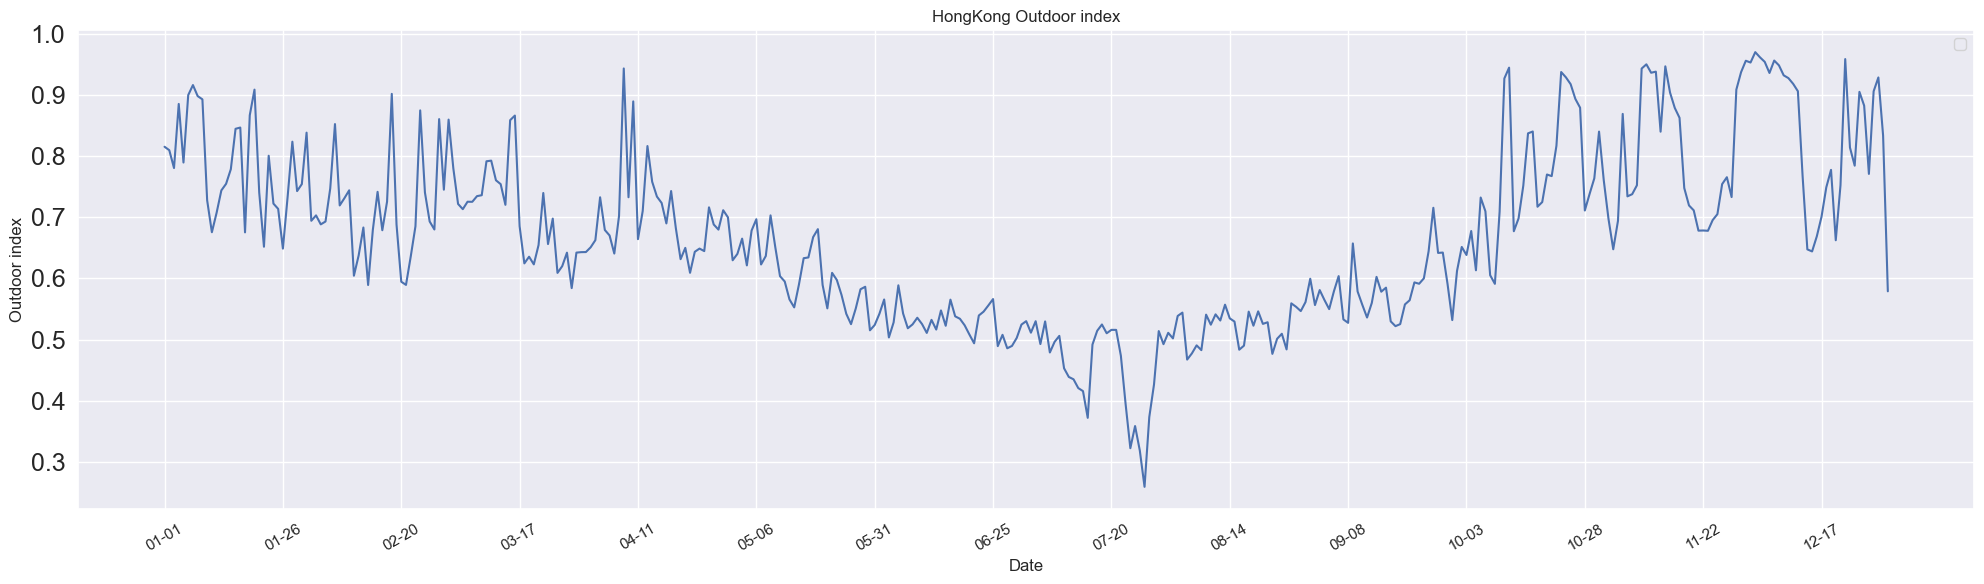

In [49]:
sns.set()
plt.figure(figsize=(20, 6))
plt.plot(daily_avg_data["Date"],daily_avg_data["Outdoor_index"])

plt.xlabel("Date")
plt.ylabel("Outdoor index")
plt.title("HongKong Outdoor index")
# 显示图形
plt.xticks(range(0,len(daily_avg_data["Date"]),25),rotation=30)
plt.yticks(size=18)
plt.tight_layout()
# 添加图例
plt.legend()
plt.show()